# 📊 Stock Market Exploratory Data Analysis (EDA)
### Analyzing Reliance, TCS, and Infosys (2019–2024)


We start by importing the necessary Python libraries.  
- `yfinance` will help us download stock data.  
- `pandas` and `numpy` are used for handling and cleaning data.  
- `matplotlib` and `seaborn` are for making charts and visualizations.  


In [12]:
# =========================
# 1. Import Libraries
# =========================
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




Now we will collect stock price data for three companies: Reliance, TCS, and Infosys.  
We are downloading data from 2019 to 2024 using `yfinance`.  
This will give us daily stock prices like Open, High, Low, Close, and Volume.  
We will store it in a dataframe called `data` and look at the first few rows.  


In [13]:
# =========================
# 2. Data Collection
# =========================
tickers = ["RELIANCE.NS", "TCS.NS", "INFY.NS"]

# Download stock data for last 5 years
data = yf.download(tickers, start="2019-01-01", end="2024-01-01")
data.head()


C:\Users\taran\AppData\Local\Temp\ipykernel_19224\2470764358.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2019-01-01", end="2024-01-01")
[*********************100%***********************]  3 of 3 completed


Price            Close                                 High              \
Ticker         INFY.NS RELIANCE.NS       TCS.NS     INFY.NS RELIANCE.NS   
Date                                                                      
2019-01-01  568.239990  498.490601  1717.571411  569.308030  501.292148   
2019-01-02  571.657776  491.998230  1736.075684  575.887225  501.158723   
2019-01-03  571.743164  485.928314  1714.999146  578.450434  495.644647   
2019-01-04  564.822266  488.551910  1694.147705  575.801748  491.131092   
2019-01-07  573.921936  491.264496  1713.148071  575.545325  497.356669   

Price                           Low                                 Open  \
Ticker           TCS.NS     INFY.NS RELIANCE.NS       TCS.NS     INFY.NS   
Date                                                                       
2019-01-01  1724.070481  558.926713  493.643566  1701.504113  564.736840   
2019-01-02  1746.140195  565.676751  489.596917  1715.043787  569.051768   
2019-01-03  1755.618616  566.573809  484.749906  1708.815981  574.178274   
2019-01-04  1716.127328  556.235234  480.747723  1661.787551  573.964698   
2019-01-07  1722.987028  565.206720  489.596920  1697.893188  568.197232   

Price                                 Volume                       
Ticker     RELIANCE.NS       TCS.NS  INFY.NS RELIANCE.NS   TCS.NS  
Date                                                               
2019-01-01  500.380542  1711.433315  2943390     9746670  1094883  
2019-01-02  495.600156  1719.557060  7416655    15628818  2100463  
2019-01-03  492.487392  1732.194766  6827249    16288287  2611668  
2019-01-04  487.996071  1715.044187  7889310    18516544  4280862  
2019-01-07  492.265036  1707.641901  8046340    12060290  1856423

Before doing analysis, we need to clean the data.  
We will check for missing values and remove them if needed.  
We also reset the index so that the Date column is easy to use later.  
This makes our dataset ready for analysis.  


In [14]:
# =========================
# 3. Data Cleaning
# =========================
# Drop rows with missing values
data = data.dropna()

# Reset index to have Date as column
data = data.reset_index()

print("Shape of dataset:", data.shape)
data.head()


Shape of dataset: (1235, 16)


Price        Date       Close                                 High  \
Ticker                INFY.NS RELIANCE.NS       TCS.NS     INFY.NS   
0      2019-01-01  568.239990  498.490601  1717.571411  569.308030   
1      2019-01-02  571.657776  491.998230  1736.075684  575.887225   
2      2019-01-03  571.743164  485.928314  1714.999146  578.450434   
3      2019-01-04  564.822266  488.551910  1694.147705  575.801748   
4      2019-01-07  573.921936  491.264496  1713.148071  575.545325   

Price                                   Low                           \
Ticker RELIANCE.NS       TCS.NS     INFY.NS RELIANCE.NS       TCS.NS   
0       501.292148  1724.070481  558.926713  493.643566  1701.504113   
1       501.158723  1746.140195  565.676751  489.596917  1715.043787   
2       495.644647  1755.618616  566.573809  484.749906  1708.815981   
3       491.131092  1716.127328  556.235234  480.747723  1661.787551   
4       497.356669  1722.987028  565.206720  489.596920  1697.893188   

Price         Open                            Volume                       
Ticker     INFY.NS RELIANCE.NS       TCS.NS  INFY.NS RELIANCE.NS   TCS.NS  
0       564.736840  500.380542  1711.433315  2943390     9746670  1094883  
1       569.051768  495.600156  1719.557060  7416655    15628818  2100463  
2       574.178274  492.487392  1732.194766  6827249    16288287  2611668  
3       573.964698  487.996071  1715.044187  7889310    18516544  4280862  
4       568.197232  492.265036  1707.641901  8046340    12060290  1856423

In this step, we study each stock individually.  
We will look at price trends, daily returns, and traded volumes.  
This helps us understand how each stock behaved in the past.  


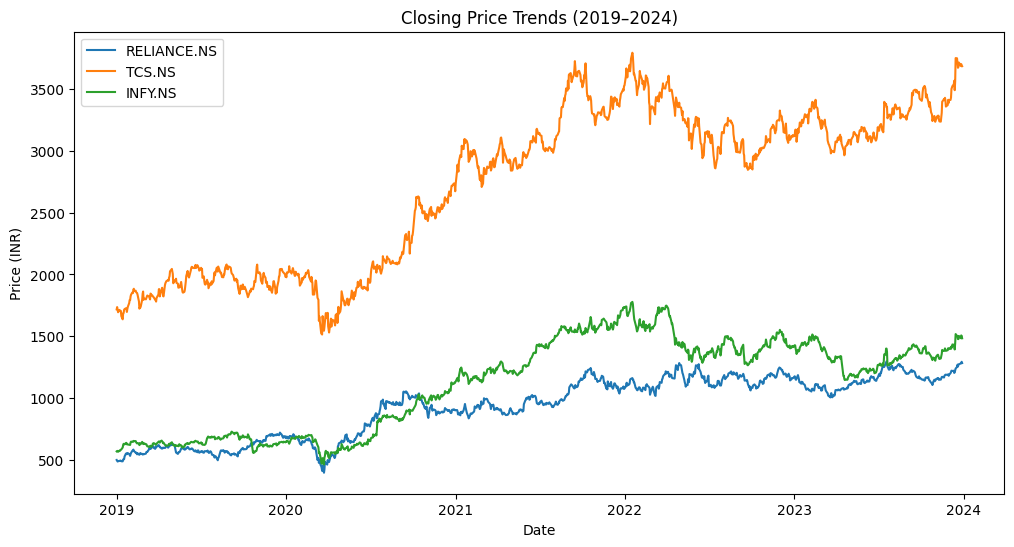

In [15]:
# =========================
# 4. Univariate Analysis
# =========================

# Closing Price Trends
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(data["Date"], data["Close"][ticker], label=ticker)
plt.legend()
plt.title("Closing Price Trends (2019–2024)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.show()


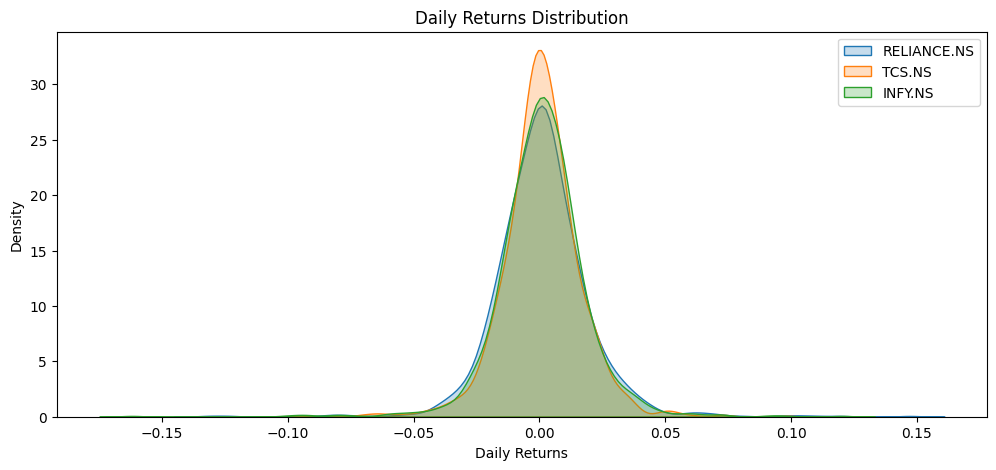

In [16]:
# Daily Returns Distribution
returns = data["Close"].pct_change().dropna()

plt.figure(figsize=(12,5))
for ticker in tickers:
    sns.kdeplot(returns[ticker], label=ticker, fill=True)
plt.title("Daily Returns Distribution")
plt.xlabel("Daily Returns")
plt.legend()
plt.show()


Here we compare stocks with each other.  
We will check if the returns of Reliance, TCS, and Infosys are related.  
Correlation and scatter plots help us see these relationships clearly.  


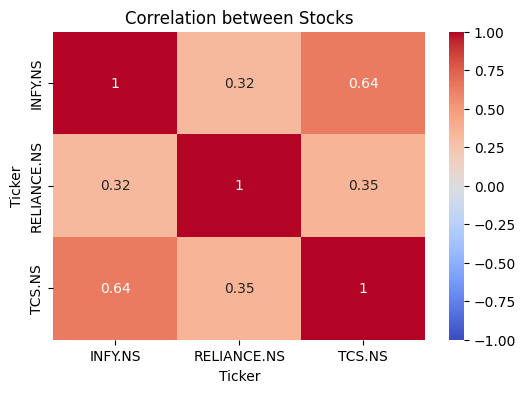

In [17]:
# =========================
# 5. Bivariate Analysis
# =========================

# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Stocks")
plt.show()


We now calculate moving averages like 50-day and 200-day.  
These smooth out daily ups and downs to show long-term trends.  
It helps us see whether the stock is generally rising or falling.  


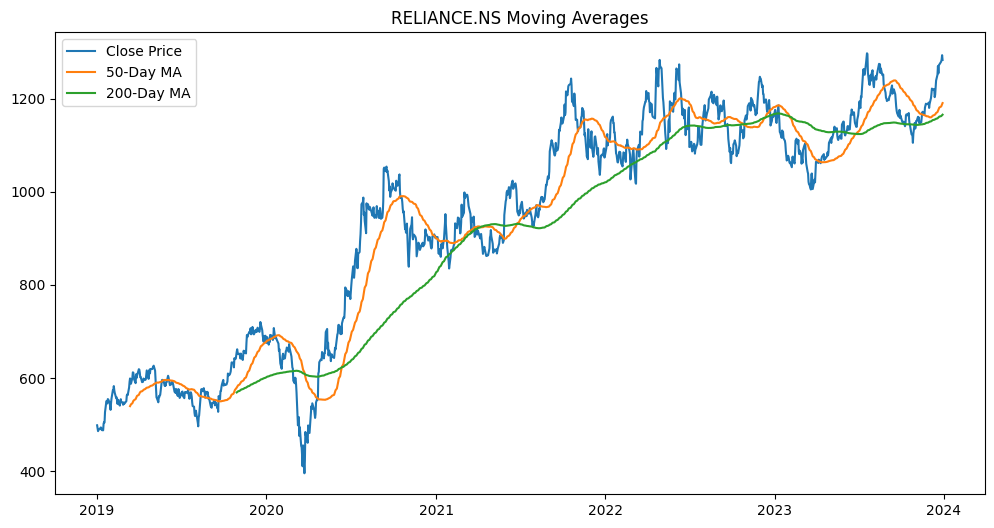

In [18]:
# =========================
# 6. Rolling Statistics (50-day and 200-day Moving Averages)
# =========================

plt.figure(figsize=(12,6))
stock = "RELIANCE.NS"
plt.plot(data["Date"], data["Close"][stock], label="Close Price")
plt.plot(data["Date"], data["Close"][stock].rolling(50).mean(), label="50-Day MA")
plt.plot(data["Date"], data["Close"][stock].rolling(200).mean(), label="200-Day MA")
plt.legend()
plt.title(f"{stock} Moving Averages")
plt.show()


Volatility means how much a stock price moves up and down.  
We will calculate rolling standard deviation (30-day) to see which stock is more risky.  
This is useful for investors who want stable returns.  


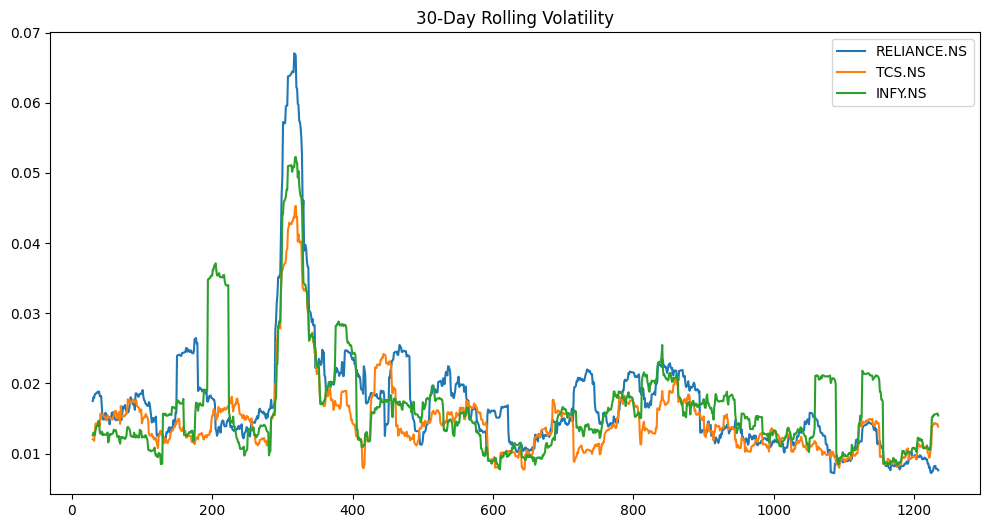

In [19]:
# =========================
# 7. Volatility Analysis
# =========================
volatility = returns.rolling(window=30).std()

plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(volatility.index, volatility[ticker], label=ticker)
plt.legend()
plt.title("30-Day Rolling Volatility")
plt.show()


Finally, we summarize our findings.  
We check which stock gave the best returns, which was most volatile, and whether IT stocks are correlated.  
This conclusion makes our project professional and useful for decision-making.  


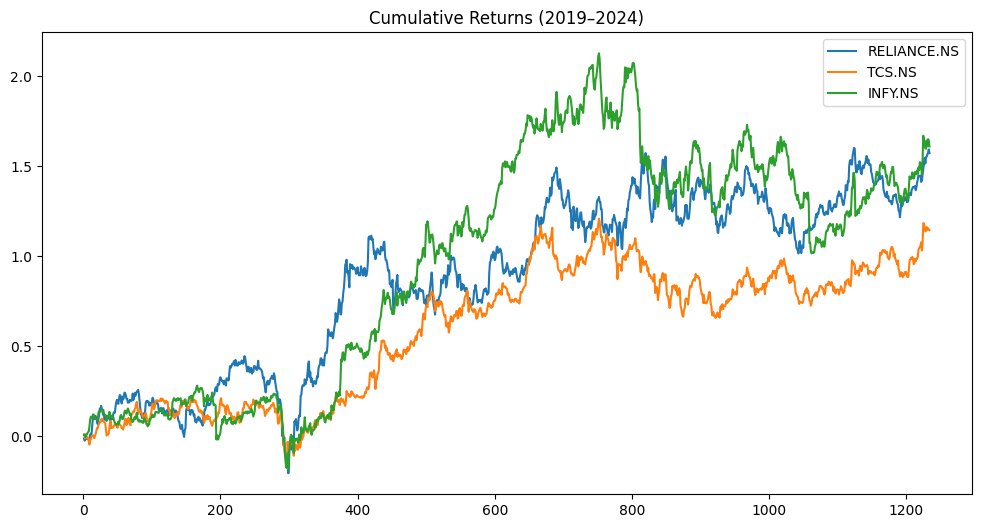

Final Cumulative Returns (2019–2024):
Ticker
INFY.NS        1.610316
RELIANCE.NS    1.573728
TCS.NS         1.145616
Name: 1234, dtype: float64


In [20]:
# =========================
# 8. Insights & Observations
# =========================

cumulative_returns = (1 + returns).cumprod() - 1
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)
plt.legend()
plt.title("Cumulative Returns (2019–2024)")
plt.show()

print("Final Cumulative Returns (2019–2024):")
print(cumulative_returns.iloc[-1])
